<a href="https://colab.research.google.com/github/leonardo-91/aprendizaje_Maquina/blob/main/Parcial_Aprendizaje_Maquina_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parcial Aprendizaje Maquina**

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6c/Javeriana.svg">

##Integrantes:

*   **Edison Leonardo Neira Espitia**
*   **Juan Carlos Contreras Lopez**

# **Parte 1**

**Importamos librerias**

In [1]:
!pip install rake-nltk

     |████████████████████████████████| 1.5 MB 24.7 MB/s 
     |████████████████████████████████| 749 kB 44.0 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import collections
import operator
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

Librerias de visualizacion

In [3]:
!pip install plotly==3.10.0
!pip install cufflinks==0.16

     |████████████████████████████████| 41.5 MB 1.4 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=76d178ec0e85030014ebbfca3473bf2572f2cfa77bcd41b36ec7f1a23905bd0c
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cufflinks 0.17.3 requires plotly>=4.1.1, but you have plotly 3.10.0 which is incompatible.
     |████████████████████████████████| 81 kB 7.2 MB/s 
  Created wheel for cufflinks: filename=cufflinks-0.16-py3-none-any.whl size=67602 sha256=52d48845edc5b3c284e2a61ae9cced8f4e93b1519455a317770cbbadb4b40122
  Stored in directory: /

In [4]:
import cufflinks as cf
print(cf.__version__)
cf.set_config_file(offline=True)
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

0.16


Funcion de visualizacion

In [5]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

**Importamos set de datos**

In [6]:
df_movies = pd.read_csv('https://query.data.world/s/uikepcpffyo2nhig52xxeevdialfl7')

##1 - Analisis de datos

In [7]:
df_movies.head(2)

,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
0,1,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/shawshank_rede...,27 Jan 1998,NaN,Columbia Pictures,NaN,True
1,2,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather/,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com,True


In [8]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         250 non-null    int64  
 1   Title              250 non-null    object 
 2   Year               250 non-null    int64  
 3   Rated              250 non-null    object 
 4   Released           248 non-null    object 
 5   Runtime            250 non-null    object 
 6   Genre              250 non-null    object 
 7   Director           250 non-null    object 
 8   Writer             249 non-null    object 
 9   Actors             250 non-null    object 
 10  Plot               250 non-null    object 
 11  Language           250 non-null    object 
 12  Country            250 non-null    object 
 13  Awards             245 non-null    object 
 14  Poster             250 non-null    object 
 15  Ratings.Source     250 non-null    object 
 16  Ratings.Value      250 non

Mostrar todos los resultados de un Data Frame

In [9]:
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 9999)
pd.set_option('display.max_columns', None)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 9999]


Describimos los datos

In [10]:
df_movies.describe()

,Unnamed: 0,Year,Metascore,imdbRating,tomatoMeter,tomatoImage,tomatoRating,tomatoReviews,tomatoFresh,tomatoRotten,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews
count,250.000000,250.000000,177.000000,250.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,125.500000,1982.676000,80.045198,8.244000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,72.312977,24.809212,11.030340,0.245735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1921.000000,53.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,63.250000,1961.250000,72.000000,8.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,125.500000,1988.000000,81.000000,8.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,187.750000,2003.000000,89.000000,8.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,250.000000,2017.000000,100.000000,9.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Peliculas unicas

In [11]:
df_movies.Title.value_counts()

The Shawshank Redemption                                                1
The Last Picture Show                                                   1
The Grand Budapest Hotel                                                1
Mad Max: Fury Road                                                      1
The Princess Bride                                                      1
What Ever Happened to Baby Jane?                                        1
Million Dollar Baby                                                     1
Jurassic Park                                                           1
Touch of Evil                                                           1
Spider-Man: Homecoming                                                  1
Before Sunrise                                                          1
The Truman Show                                                         1
Harry Potter and the Deathly Hallows: Part 2                            1
Star Wars: The Force Awakens          

Años unicos

In [12]:
df_movies.Year.value_counts()

1995    8
2015    7
1999    7
2014    7
2003    6
1998    6
1994    5
1975    5
2013    5
2016    5
1959    5
1940    5
1962    5
2010    5
1993    5
1982    4
1976    4
1957    4
2000    4
2008    4
2004    4
1984    4
2017    4
1980    4
2007    4
1991    4
1946    4
2009    4
2001    4
1992    3
1983    3
2012    3
1944    3
1939    3
1973    3
1958    3
2005    3
1954    3
1974    3
2002    3
1950    3
1979    3
2006    3
1996    3
1986    3
2011    3
1949    2
1961    2
1969    2
1953    2
1988    2
1945    2
1989    2
1972    2
1967    2
1948    2
1971    2
1960    2
1951    2
1997    2
1941    2
1952    2
1977    2
1987    2
1947    1
1934    1
1966    1
1955    1
1930    1
1935    1
1956    1
1990    1
1968    1
1978    1
1926    1
1925    1
1963    1
1921    1
1964    1
1985    1
1981    1
1942    1
1936    1
1931    1
1970    1
Name: Year, dtype: int64

Imprimimos las columnas del data set 

In [13]:
df_movies.columns

Index(['Unnamed: 0', 'Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre',
       'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards',
       'Poster', 'Ratings.Source', 'Ratings.Value', 'Metascore', 'imdbRating',
       'imdbVotes', 'imdbID', 'Type', 'tomatoMeter', 'tomatoImage',
       'tomatoRating', 'tomatoReviews', 'tomatoFresh', 'tomatoRotten',
       'tomatoConsensus', 'tomatoUserMeter', 'tomatoUserRating',
       'tomatoUserReviews', 'tomatoURL', 'DVD', 'BoxOffice', 'Production',
       'Website', 'Response'],
      dtype='object')

**Visualizacion**

Años con mas peliculas

In [14]:
configure_plotly_browser_state()
df_movies.Year.value_counts().iplot(kind='bar', xTitle='Año', yTitle='Cantidad')

Analizamos los generos 

In [15]:
configure_plotly_browser_state()
df_movies.Genre.value_counts().head(20).iplot(kind='bar',mode='markers',title="Top 20 peliculas por genero")

Correlacion de variables 

In [16]:
df_movies[['Unnamed: 0','Year','Metascore','imdbRating']].corr()

,Unnamed: 0,Year,Metascore,imdbRating
Unnamed: 0,1.000000,-0.023103,-0.163610,-0.894528
Year,-0.023103,1.000000,-0.340852,0.045496
Metascore,-0.163610,-0.340852,1.000000,0.172120
imdbRating,-0.894528,0.045496,0.172120,1.000000


Text(0.5, 1.0, 'Correlacion de variables Numericas')

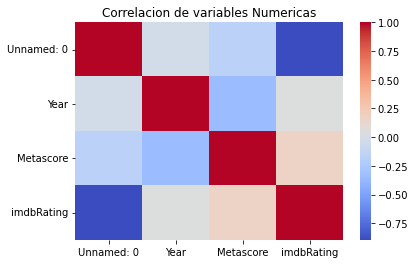

In [17]:
sns.heatmap(df_movies[['Unnamed: 0','Year','Metascore','imdbRating']].corr(),cmap='coolwarm')
plt.title('Correlacion de variables Numericas')

##2 - Limpieza y estandarizacion de datos

Eliminacion de la columna Unnamed:0 ya que es un ID y no es relevante para nueysro analisis 

In [18]:
df_movies.drop(columns=['Unnamed: 0'], inplace=True)

In [19]:
df_movies.columns

Index(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director',
       'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster',
       'Ratings.Source', 'Ratings.Value', 'Metascore', 'imdbRating',
       'imdbVotes', 'imdbID', 'Type', 'tomatoMeter', 'tomatoImage',
       'tomatoRating', 'tomatoReviews', 'tomatoFresh', 'tomatoRotten',
       'tomatoConsensus', 'tomatoUserMeter', 'tomatoUserRating',
       'tomatoUserReviews', 'tomatoURL', 'DVD', 'BoxOffice', 'Production',
       'Website', 'Response'],
      dtype='object')

Analizamos los valores nulos

In [20]:
df_movies.isnull()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings.Source,Ratings.Value,Metascore,imdbRating,imdbVotes,imdbID,Type,tomatoMeter,tomatoImage,tomatoRating,tomatoReviews,tomatoFresh,tomatoRotten,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,False,False,True,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,False,False,True,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,False,False,True,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,False,False,True,False,True,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,False,False,True,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False


Identificamos que existen columna completamnete nulas como: [**tomatoMeter,	tomatoImage,	tomatoRating,	tomatoReviews,	tomatoFresh,	tomatoRotten,	tomatoConsensus,	tomatoUserMeter,	tomatoUserRating,	tomatoUserReviews**] por lo cual decidimos eliminarlas.

In [21]:
df_movies.drop(columns=['tomatoMeter', 'tomatoImage', 'tomatoRating', 'tomatoReviews', 'tomatoFresh', 'tomatoRotten', 'tomatoConsensus', 'tomatoUserMeter', 'tomatoUserRating', 'tomatoUserReviews'], inplace=True)

In [22]:
df_movies.head(3)

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings.Source,Ratings.Value,Metascore,imdbRating,imdbVotes,imdbID,Type,tomatoURL,DVD,BoxOffice,Production,Website,Response
0,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and Shawshank Redemption""), Frank Darabont (screenplay)","Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler","Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",English,USA,Nominated for 7 Oscars. Another 19 wins & 30 nominations.,https://images-na.ssl-images-amazon.com/images/M/MV5BODU4MjU4NjIwNl5BMl5BanBnXkFtZTgwMDU2MjEyMDE@._V1_SX300.jpg,Internet Movie Database,9.3/10,80.0,9.3,"1,825,626",tt0111161,movie,http://www.rottentomatoes.com/m/shawshank_redemption/,27 Jan 1998,NaN,Columbia Pictures,NaN,True
1,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola (screenplay), Mario Puzo (novel)","Marlon Brando, Al Pacino, James Caan, Richard S. Castellano",The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.,"English, Italian, Latin",USA,Won 3 Oscars. Another 23 wins & 27 nominations.,https://images-na.ssl-images-amazon.com/images/M/MV5BZTRmNjQ1ZDYtNDgzMy00OGE0LWE4N2YtNTkzNWQ5ZDhlNGJmL2ltYWdlL2ltYWdlXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_SX300.jpg,Internet Movie Database,9.2/10,100.0,9.2,"1,243,444",tt0068646,movie,http://www.rottentomatoes.com/m/godfather/,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com,True
2,The Godfather: Part II,1974,R,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo (screenplay), Mario Puzo (novel)","Al Pacino, Robert Duvall, Diane Keaton, Robert De Niro","The early life and career of Vito Corleone in 1920s New York is portrayed while his son, Michael, expands and tightens his grip on the family crime syndicate.","English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 10 wins & 20 nominations.,https://images-na.ssl-images-amazon.com/images/M/MV5BMjZiNzIxNTQtNDc5Zi00YWY1LThkMTctMDgzYjY4YjI1YmQyL2ltYWdlL2ltYWdlXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_SX300.jpg,Internet Movie Database,9.0/10,85.0,9.0,"856,870",tt0071562,movie,http://www.rottentomatoes.com/m/godfather_part_ii/,24 May 2005,NaN,Paramount Pictures,http://www.thegodfather.com/,True


In [23]:
df_movies.isnull()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings.Source,Ratings.Value,Metascore,imdbRating,imdbVotes,imdbID,Type,tomatoURL,DVD,BoxOffice,Production,Website,Response
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Nos damos cuenta existe una pelicua sin director y procedemos a agregarlo

In [24]:
df_movies.loc[df_movies['Title']=='Brief Encounter','Writer']="Noel Coward"

Analisis de variables nulas en mayoria por lo cual decidimos eliminarlas como:

*   BoxOffice [Nulos=175,No nulos=75]
*   Website [Nulos=119,No nulos=131]
*   Metascore [Nulos=73,No nulos=177]




In [25]:
df_movies.BoxOffice.isnull().value_counts()

True     175
False     75
Name: BoxOffice, dtype: int64

In [26]:
df_movies.Website.isnull().value_counts()

False    131
True     119
Name: Website, dtype: int64

In [27]:
df_movies.Metascore.isnull().value_counts()

False    177
True      73
Name: Metascore, dtype: int64

**Eliminacion**

In [28]:
df_movies.drop(columns=['BoxOffice', 'Website', 'Metascore'], inplace=True)

In [29]:
df_movies.head(2)

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings.Source,Ratings.Value,imdbRating,imdbVotes,imdbID,Type,tomatoURL,DVD,Production,Response
0,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and Shawshank Redemption""), Frank Darabont (screenplay)","Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler","Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",English,USA,Nominated for 7 Oscars. Another 19 wins & 30 nominations.,https://images-na.ssl-images-amazon.com/images/M/MV5BODU4MjU4NjIwNl5BMl5BanBnXkFtZTgwMDU2MjEyMDE@._V1_SX300.jpg,Internet Movie Database,9.3/10,9.3,"1,825,626",tt0111161,movie,http://www.rottentomatoes.com/m/shawshank_redemption/,27 Jan 1998,Columbia Pictures,True
1,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola (screenplay), Mario Puzo (novel)","Marlon Brando, Al Pacino, James Caan, Richard S. Castellano",The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.,"English, Italian, Latin",USA,Won 3 Oscars. Another 23 wins & 27 nominations.,https://images-na.ssl-images-amazon.com/images/M/MV5BZTRmNjQ1ZDYtNDgzMy00OGE0LWE4N2YtNTkzNWQ5ZDhlNGJmL2ltYWdlL2ltYWdlXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_SX300.jpg,Internet Movie Database,9.2/10,9.2,"1,243,444",tt0068646,movie,http://www.rottentomatoes.com/m/godfather/,09 Oct 2001,Paramount Pictures,True


In [30]:
df_movies.columns

Index(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director',
       'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster',
       'Ratings.Source', 'Ratings.Value', 'imdbRating', 'imdbVotes', 'imdbID',
       'Type', 'tomatoURL', 'DVD', 'Production', 'Response'],
      dtype='object')

In [31]:
df_movies.head(2) 

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings.Source,Ratings.Value,imdbRating,imdbVotes,imdbID,Type,tomatoURL,DVD,Production,Response
0,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and Shawshank Redemption""), Frank Darabont (screenplay)","Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler","Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",English,USA,Nominated for 7 Oscars. Another 19 wins & 30 nominations.,https://images-na.ssl-images-amazon.com/images/M/MV5BODU4MjU4NjIwNl5BMl5BanBnXkFtZTgwMDU2MjEyMDE@._V1_SX300.jpg,Internet Movie Database,9.3/10,9.3,"1,825,626",tt0111161,movie,http://www.rottentomatoes.com/m/shawshank_redemption/,27 Jan 1998,Columbia Pictures,True
1,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola (screenplay), Mario Puzo (novel)","Marlon Brando, Al Pacino, James Caan, Richard S. Castellano",The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.,"English, Italian, Latin",USA,Won 3 Oscars. Another 23 wins & 27 nominations.,https://images-na.ssl-images-amazon.com/images/M/MV5BZTRmNjQ1ZDYtNDgzMy00OGE0LWE4N2YtNTkzNWQ5ZDhlNGJmL2ltYWdlL2ltYWdlXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_SX300.jpg,Internet Movie Database,9.2/10,9.2,"1,243,444",tt0068646,movie,http://www.rottentomatoes.com/m/godfather/,09 Oct 2001,Paramount Pictures,True


Luego de analizar de acuerdo  a nuestro criterio de experto (Porfe no somos full experto en peliculas) decidimos  trabajar con las isguientes columnas: 

*   **Title**
*   **Year**
*   **Genre [Incluimos Todos]**
*   **Plot**
*   **ImdbRating**
*   **Actors [Maximo 5]**
*   **Writer [Maximo 1]**
*   **Director [Maximo 1]** 




In [32]:
df_movies.columns

Index(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director',
       'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster',
       'Ratings.Source', 'Ratings.Value', 'imdbRating', 'imdbVotes', 'imdbID',
       'Type', 'tomatoURL', 'DVD', 'Production', 'Response'],
      dtype='object')

In [33]:
df_movies.drop(columns=['Rated', 'Released', 'Runtime','Language','Country','Awards','Poster','Ratings.Source', 'Ratings.Value', 'imdbVotes', 'imdbID','Type', 'tomatoURL', 'DVD', 'Production', 'Response'], inplace=True)

In [34]:
df_movies.columns

Index(['Title', 'Year', 'Genre', 'Director', 'Writer', 'Actors', 'Plot',
       'imdbRating'],
      dtype='object')

In [35]:
df_movies.head(2)

,Title,Year,Genre,Director,Writer,Actors,Plot,imdbRating
0,The Shawshank Redemption,1994,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and Shawshank Redemption""), Frank Darabont (screenplay)","Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler","Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",9.3
1,The Godfather,1972,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola (screenplay), Mario Puzo (novel)","Marlon Brando, Al Pacino, James Caan, Richard S. Castellano",The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.,9.2


**Luego de limpiar y seleccionar caracteristicas de nuestro set de datos procedemos a normalizar lo que sea necesario. (En formato y caracteristicas)**

**Normalizacion de columnas (Minuscula)**

In [36]:
df_movies.columns = df_movies.columns.str.lower()

In [37]:
df_movies.columns

Index(['title', 'year', 'genre', 'director', 'writer', 'actors', 'plot',
       'imdbrating'],
      dtype='object')

**Normalizacion de campos**

Eliminamos espacios, caracteres especiales y pasamos todo a minuscula, es importante resaltar que maximo seleccionaremos **5** **actores**, **1** **director** y **1** **escritor**, en caso que una pelicula tenga mas valores seran omitidos

In [38]:
df_movies['actors'] = df_movies['actors'].str.replace(' ', '').str.lower().str.split(',').str[:5].apply(' '.join)

In [39]:
df_movies['director'] = df_movies['director'].str.replace(' ', '').str.lower()

In [40]:
df_movies['genre'] = df_movies['genre'].str.lower().str.replace(',', ' ')

In [41]:
df_movies['writer'] = df_movies['writer'].str.replace(' ', '').str.lower().str.split(',').str[0].str.split('(').str[0]

In [42]:
df_movies['title'] = df_movies['title'].str.lower()

Creamos funcion para extraer las palabras mas impirtaantes (KEYWORDS) a partir de la descripcion de la pelica campo (**Plot**) usando la libreria rake-nltk[1] que justamnete nos permite realizar esta extraccion de valor

In [43]:
def extract_key_words(input_str):
 r = Rake()
 r.extract_keywords_from_text(input_str.lower())
 key_words_dict_scores = r.get_word_degrees()
 sorted_key_words_dict_scores = sorted(key_words_dict_scores.items(), key=operator.itemgetter(1), reverse=True)
 sorted_dict = collections.OrderedDict(sorted_key_words_dict_scores)
 return sorted_dict, list(sorted_dict.keys())[:round(len(sorted_dict.keys())/2)]

Ahora usamos la funcion y reemplazamos por el campo **Plot**

In [44]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [45]:
df_movies['plot'] = df_movies['plot'].apply(lambda x: extract_key_words(x)[1]).apply(' '.join)

In [46]:
df_movies.head(2)

,title,year,genre,director,writer,actors,plot,imdbrating
0,the shawshank redemption,1994,crime drama,frankdarabont,stephenking,timrobbins morganfreeman bobgunton williamsadler,two imprisoned men bond finding solace,9.3
1,the godfather,1972,crime drama,francisfordcoppola,mariopuzo,marlonbrando alpacino jamescaan richards.castellano,organized crime dynasty transfers control aging,9.2


Listo **ya** tenemos nuestro Data set listo para realizar el modelo de cluster y la funcion de recomendacion 

**Creacion nuevo vector**[1]

Ahora procedemos a crear un vector de caracteristicas  a partir de nuestro dataframe terminado

In [47]:
df_clean_movies=df_movies.copy()

In [48]:
df_clean_movies.set_index('title', inplace = True)

In [49]:
df_clean_movies.head(2)

,year,genre,director,writer,actors,plot,imdbrating
title,,,,,,,
the shawshank redemption,1994,crime drama,frankdarabont,stephenking,timrobbins morganfreeman bobgunton williamsadler,two imprisoned men bond finding solace,9.3
the godfather,1972,crime drama,francisfordcoppola,mariopuzo,marlonbrando alpacino jamescaan richards.castellano,organized crime dynasty transfers control aging,9.2


In [50]:
df_clean_movies['vector_palabras'] = df_clean_movies['year'].astype(str) +' '+df_clean_movies['genre'] + ' ' + df_clean_movies['director'] + ' ' + df_clean_movies['writer'] + ' ' +df_clean_movies['actors'] + ' ' + df_clean_movies['plot']+ ' ' + df_clean_movies['imdbrating'].astype(str)
vector_palabras = df_clean_movies[['vector_palabras']]
vector_palabras.head()

,vector_palabras
title,
the shawshank redemption,1994 crime drama frankdarabont stephenking timrobbins morganfreeman bobgunton williamsadler two imprisoned men bond finding solace 9.3
the godfather,1972 crime drama francisfordcoppola mariopuzo marlonbrando alpacino jamescaan richards.castellano organized crime dynasty transfers control aging 9.2
the godfather: part ii,1974 crime drama francisfordcoppola francisfordcoppola alpacino robertduvall dianekeaton robertdeniro 1920s new york family crime syndicate early life 9.0
the dark knight,2008 action crime drama christophernolan jonathannolan christianbale heathledger aaroneckhart michaelcaine dark knight must accept one menace known joker emerges mysterious past wreaks 9.0
12 angry men,1957 crime drama sidneylumet reginaldrose martinbalsam johnfiedler leej.cobb e.g.marshall jury holdout attempts prevent miscarriage 8.9


Procedemo a crear el **vector**[1]

In [51]:
vectorizer = CountVectorizer()
matrix_vector = vectorizer.fit_transform(vector_palabras['vector_palabras'])

Imprimimos la distribucion

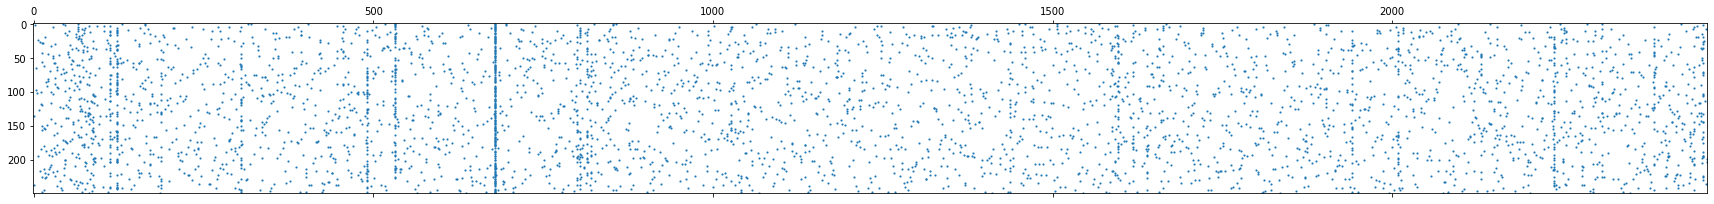

In [52]:
plt.figure(figsize=(30, 20))
plt.spy(matrix_vector, markersize=1);

In [53]:
matrix_vector

<250x2464 sparse matrix of type '<class 'numpy.int64'>'
	with 4215 stored elements in Compressed Sparse Row format>

**Listo tenemos nuestra matriz para le modelo de recomendacion**

##3 - Modelo de clusterización

En este caso Vamos a usar el modeo no supervisado Kmeans

Importamos librerias

In [54]:
from sklearn.cluster import KMeans

Revisamos nuestro dataset

In [55]:
df_movies.head(5)

,title,year,genre,director,writer,actors,plot,imdbrating
0,the shawshank redemption,1994,crime drama,frankdarabont,stephenking,timrobbins morganfreeman bobgunton williamsadler,two imprisoned men bond finding solace,9.3
1,the godfather,1972,crime drama,francisfordcoppola,mariopuzo,marlonbrando alpacino jamescaan richards.castellano,organized crime dynasty transfers control aging,9.2
2,the godfather: part ii,1974,crime drama,francisfordcoppola,francisfordcoppola,alpacino robertduvall dianekeaton robertdeniro,1920s new york family crime syndicate early life,9.0
3,the dark knight,2008,action crime drama,christophernolan,jonathannolan,christianbale heathledger aaroneckhart michaelcaine,dark knight must accept one menace known joker emerges mysterious past wreaks,9.0
4,12 angry men,1957,crime drama,sidneylumet,reginaldrose,martinbalsam johnfiedler leej.cobb e.g.marshall,jury holdout attempts prevent miscarriage,8.9


Creamos un nuevo data set para closterizar

In [56]:
df_cluster_movies=df_movies.copy()

**Debido a que la mayoria de variables son nominales procedemos a convertirlas a numericas.**

In [57]:
df_cluster_movies=pd.get_dummies(df_cluster_movies,columns=['title','genre','director','writer','actors','plot'],drop_first = True)

In [58]:
df_cluster_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 1210 entries, year to plot_young woman whose father terrifying beast offers physically
dtypes: float64(1), int64(1), uint8(1208)
memory usage: 299.0 KB


Convertimimos de DF a vector

In [59]:
x=df_cluster_movies.values

In [60]:
x[0]

array([1994. ,    9.3,    0. , ...,    0. ,    0. ,    0. ])

Procedemos a estandarizar los valores con la funcion **StandardScaler**

In [61]:
sc_x = StandardScaler()
sc_x.fit(x)
X_scaler = sc_x.transform(x)
print(np.mean(X_scaler)) 
print(np.std(X_scaler))

4.780014767840674e-18
1.0


Miremos el vector estandarizado

In [62]:
X_scaler[0]

array([ 0.45735899,  4.30593792, -0.06337243, ..., -0.06337243,
       -0.06337243, -0.06337243])

**Entrenamos el modelo de clusterizacion**

Vamos entrenear la clusterizacion desde **2** hasta **10** cluster

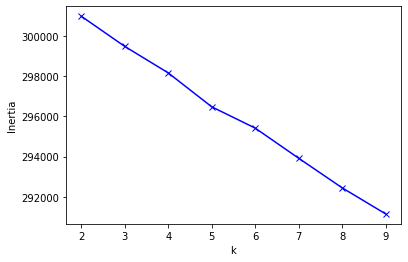

In [63]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_scaler)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

Definimos fucnion para la visualizacion de los cluster[2]

In [64]:
def experiment_number_of_clusters(X, clustering, show_metric=False,
                                  plot_data=True, plot_centers=True, plot_boundaries=False):
    plt.figure(figsize=(15,6))
    for n_clusters in range(2,10):
        clustering.n_clusters = n_clusters
        y = clustering.fit_predict(X)

        cm = plt.cm.plasma
        plt.subplot(2,4,n_clusters-1)

        plot_cluster_predictions(clustering, X, n_clusters, cm, 
                                 plot_data, plot_centers, show_metric)
def plot_cluster_predictions(clustering, X, n_clusters = None, cmap = plt.cm.plasma,
                             plot_data=True, plot_centers=True, show_metric=False,
                             title_str=""):

    assert not hasattr(clustering, "n_clusters") or \
           (hasattr(clustering, "n_clusters") and n_clusters is not None), "must specify `n_clusters` for "+str(clustering)

    if n_clusters is not None:
        clustering.n_clusters = n_clusters

    y = clustering.fit_predict(X)
    # remove elements tagged as noise (cluster nb<0)
    X = X[y>=0]
    y = y[y>=0]

    if n_clusters is None:
        n_clusters = len(np.unique(y))

    if plot_data:        
        plt.scatter(X[:,0], X[:,1], color=cmap((y*255./(n_clusters-1)).astype(int)), alpha=.5)
    if plot_centers and hasattr(clustering, "cluster_centers_"):
        plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s=150,  lw=3,
                    facecolor=cmap((np.arange(n_clusters)*255./(n_clusters-1)).astype(int)),
                    edgecolor="black")   

    if show_metric:
        if hasattr(clustering, 'inertia_'):
          inertia = clustering.inertia_
        else:
          inertia = 0
        sc = silhouette_score(X, y) if len(np.unique(y))>1 else 0
        plt.title("k=%d, inertia=%.0f sc=%.3f"%(n_clusters, inertia, sc)+title_str)
    else:
        plt.title("k=%d"%n_clusters+title_str)

    plt.axis("off")
    return

procedemos a visualizar la distribucion de los cluster graficamente

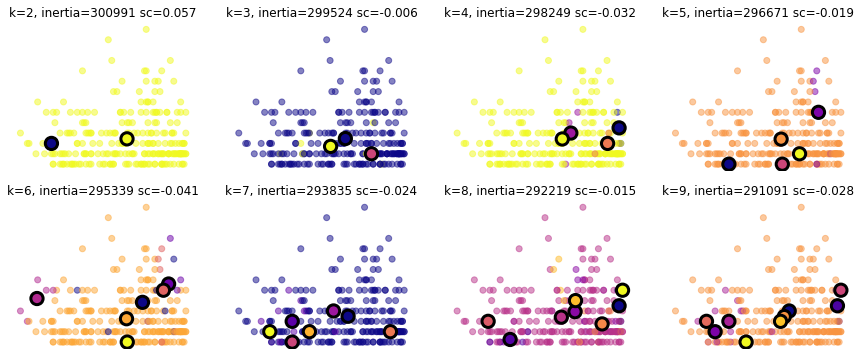

In [65]:
experiment_number_of_clusters(X_scaler, KMeans(), show_metric=True)

##4 - Funcion de recomendacion

**Cargamos y leemos el API**

En este caso nosotros usamos el api de themoviedb para realizar la busqueda por title, en casoq ue el key este vencido se debe generar uno nuevo. 

**En caso  que el Key este vencido se debe generar y reemplazar aqui**

In [94]:
API_KEY='2d52dc6b9eafb2d70b3f296f26b79f6c'#Si el api_key s evencio se debe reemplazar por uno nuevo generado aqui

**Funcion de busqueda**

Creacion de funcion de busqueda para capturar los datos de la pelicula a partir del titulo usando el API **themoviedb**. 

Page Developer - https://developers.themoviedb.org/3/getting-started

In [110]:
def searching_tittle_api(title):
  print("SOLICITANDO INFORMACION DE INTERNET")
  print("Espere....") 
  URL = 'https://api.themoviedb.org/3/search/movie?api_key='+API_KEY+"&query="+title
  print(URL)
  data = requests.get(URL) 
  status=data.status_code
  data = data.json()
  json_str = json.dumps(data)
  json_object = json.loads(json_str)
  contadorAct,contadorDic,contadorWri=0,0,0
  title ,year,genero, plot,imdbRating,actor,director,writing="","","","","","","",""
  bool_act_dic_wri=False
  status_call=False
  if status==200:
    if json_object["total_results"]>=1:
      id=json_object["results"][0]["id"]
      if id is not None:
        if len(str(id))>0:
          URL_DETAIL='https://api.themoviedb.org/3/movie/'+str(id)+'?api_key='+API_KEY
          URL_ACTORS='https://api.themoviedb.org/3/movie/'+str(id)+'/credits?api_key='+API_KEY
          data = requests.get(URL_DETAIL) 
          status=data.status_code
          data = data.json()
          json_str = json.dumps(data)
          json_object = json.loads(json_str)
          data_act = requests.get(URL_ACTORS) 
          status_act=data_act.status_code
          data_act = data_act.json()
          json_str_act = json.dumps(data_act)
          json_object_act = json.loads(json_str_act)
          if status==200:
            title=json_object['original_title']
            year=json_object['release_date']
            plot=json_object['overview']
            imdbRating=json_object['vote_average']
            for genre in json_object['genres']:
              genero+=str(genre["name"]).replace(' ', '').lower()+" "
            if status_act==200:
              for actors in json_object_act['cast']:
                if not bool_act_dic_wri:
                  if (actors["known_for_department"]=="Acting") & (contadorAct<5):
                    actor+=str(actors["name"]).replace(' ', '').lower()+" "
                    contadorAct+=1
                  if contadorAct==5 & contadorWri==1 & contadorDic==1:
                    bool_act_dic_wri=True
                else:
                  break
              for crew in json_object_act['crew']:
                 if not bool_act_dic_wri:
                  if (crew["known_for_department"]=="Writing") & (contadorWri<1):
                    writing=str(crew["name"]).replace(' ', '').lower()
                    contadorWri+=1
                  elif (crew["known_for_department"]=="Directing") & (contadorDic<1):
                    director=str(crew["name"]).replace(' ', '').lower()
                    contadorDic+=1
                  if contadorAct==5 & contadorWri==1 & contadorDic==1:
                    bool_act_dic_wri=True
                 else:
                  break 
            else:
              actor="Leonardo Dicaprio Brad Pitt Scarlett Johansson Chris Evans Robert Downey Jr."
              director="Christopher Nolan"
              writing="Christopher Nolan"
            status_call=True
            return status_call,title,year,plot,imdbRating,actor,director,writing,genero 
          else:
            print("Pelicula no encontrada infiriendo Valores.....")
            return status_call,title,year,plot,imdbRating,actor,director,writing,genero
        else:
          print("Pelicula no encontrada infiriendo Valores.....")
          return status_call,title,year,plot,imdbRating,actor,director,writing,genero
      else:
        print("Pelicula no encontrada infiriendo Valores.....")
        return status_call,title,year,plot,imdbRating,actor,director,writing,genero  
    else:
      print("Pelicula no encontrada infiriendo Valores.....")
      return status_call,title,year,plot,imdbRating,actor,director,writing,genero
  else: 
    print("Profe el API KEY vencio debe generarlo a travez del registro de esta pagina: https://www.themoviedb.org/settings/api, es importante informarle que esta pagina requiere el resgitro y generacion del KEY ")
    print("Infiriendo Valores.....")
    return status_call,title,year,plot,imdbRating,actor,director,writing,genero


Procedemos a partir del vector **matrix_vector**  a crear nuestro modelo de recomendacion. 

**Nota:** Todo el proceso de limpieza y preparacion de datos para llegar a esta matriz esta en el punto 2, ver alli si se tiene dudas de la generacion de este vector.

## **Funcion de similitud**

En este caso y de acuerdo a lo visto en clase procedemos a usar la funcion de **similitud** (**distancia**) **cosenoidal**.[1] 

In [68]:
similitud_cos = cosine_similarity(matrix_vector, matrix_vector)

Imprimimos el vector de similitud

In [69]:
similitud_cos[0]

array([1.        , 0.18257419, 0.16903085, 0.11009638, 0.13333333,
       0.06085806, 0.06085806, 0.29617444, 0.06085806, 0.06085806,
       0.12909944, 0.        , 0.        , 0.05923489, 0.06666667,
       0.16903085, 0.        , 0.        , 0.24343225, 0.06454972,
       0.11547005, 0.11846978, 0.16514456, 0.06262243, 0.05773503,
       0.06666667, 0.12909944, 0.05634362, 0.06262243, 0.24343225,
       0.        , 0.        , 0.06454972, 0.        , 0.12909944,
       0.05634362, 0.        , 0.        , 0.06454972, 0.11846978,
       0.12524486, 0.05923489, 0.        , 0.05504819, 0.06085806,
       0.        , 0.        , 0.06262243, 0.06262243, 0.12171612,
       0.13801311, 0.        , 0.        , 0.06666667, 0.11846978,
       0.        , 0.06454972, 0.        , 0.        , 0.        ,
       0.06085806, 0.12171612, 0.11846978, 0.06900656, 0.05773503,
       0.05773503, 0.0993808 , 0.06262243, 0.12909944, 0.06262243,
       0.        , 0.11268723, 0.11846978, 0.        , 0.     

In [70]:
similitud_cos

array([[1.        , 0.18257419, 0.16903085, ..., 0.06454972, 0.06454972,
        0.06666667],
       [0.18257419, 1.        , 0.4114756 , ..., 0.05892557, 0.05892557,
        0.06085806],
       [0.16903085, 0.4114756 , 1.        , ..., 0.05455447, 0.05455447,
        0.05634362],
       ...,
       [0.06454972, 0.05892557, 0.05455447, ..., 1.        , 0.0625    ,
        0.06454972],
       [0.06454972, 0.05892557, 0.05455447, ..., 0.0625    , 1.        ,
        0.06454972],
       [0.06666667, 0.06085806, 0.05634362, ..., 0.06454972, 0.06454972,
        1.        ]])

Es importante aclarar que tenemos **1** como valor de similitud dado a que una pelicula es exactamente igual a su contra parte. 

**Funcion de transformacion de variables**

In [71]:
def transformation_fuction(df):
  df['plot'] = df['plot'].apply(lambda x: extract_key_words(x)[1]).apply(' '.join)
  df_piv_movies=df.copy()
  df_piv_movies.set_index('title', inplace = True)
  df_piv_movies['vector_palabras'] = df_piv_movies['year'].astype(str) +' '+df_piv_movies['genre'] + ' ' + df_piv_movies['director'] + ' ' + df_piv_movies['writer'] + ' ' +df_piv_movies['actors'] + ' ' + df_piv_movies['plot']+ ' ' + df_piv_movies['imdbrating'].astype(str)
  vector_palabras_piv = df_piv_movies[['vector_palabras']]
  return vector_palabras_piv
 


## **Funcion de recomendacion**

Procedemos a crear la funcion que retronara el top 10 de peliculas recomendadas de acuerdo al titulo ingresado

In [91]:
def top_ten_movies_recommendation(title_text):
 global df_movies,vector_palabras,similitud_cos
 if title_text.lower() in vector_palabras.index:
   idx = np.where(vector_palabras.index==title_text.lower())[0][0]
   top_idx_list = pd.Series(similitud_cos[idx]).sort_values(ascending = False)[1:10+1].index
   return list(vector_palabras.iloc[top_idx_list].index)
 else:
   status_call,title,year,plot,imdbRating,actor,director,writing,genero=searching_tittle_api(title_text)
   if status_call:
     if title.lower() in vector_palabras.index:
        idx = np.where(vector_palabras.index==title.lower())[0][0]
        top_idx_list = pd.Series(similitud_cos[idx]).sort_values(ascending = False)[1:10+1].index
        return list(vector_palabras.iloc[top_idx_list].index)
     else:
      df_movies=df_movies.append({'title': title.lower(), 'year': year.replace(' ', '').lower().split('-')[0], 'genre': genero.rstrip(),'director': director,'writer': writing,'actors': actor,'plot': plot,'imdbrating': imdbRating,}, ignore_index=True)
      vectorizer_piv = CountVectorizer()
      vector_palabras=transformation_fuction(df_movies)
      matrix_vector = vectorizer_piv.fit_transform(vector_palabras['vector_palabras'])
      similitud_cos = cosine_similarity(matrix_vector, matrix_vector)
      idx = np.where(vector_palabras.index==title.lower())[0][0]
      top_idx_list = pd.Series(similitud_cos[idx]).sort_values(ascending = False)[1:10+1].index
      return list(vector_palabras.iloc[top_idx_list].index)
   else:
    print('Valores por default')
    df_movies=df_movies.append({'title': title_text.lower(), 'year': '2000', 'genre': 'action adventure sciencefiction','director': 'quentintarantino','writer': 'ricardosilvaromero','actors': 'judidench bryancranston rickygervais jeremyrenner michaelcaine','plot': 'in the united states every piece of land every house every automobile every airplane every patent every manuscript for a book or a film has its virtual counterpart recorded and described in documents and databases','imdbrating': '8.0',}, ignore_index=True)
    vectorizer_piv = CountVectorizer()
    vector_palabras=transformation_fuction(df_movies)
    matrix_vector = vectorizer_piv.fit_transform(vector_palabras['vector_palabras'])
    similitud_cos = cosine_similarity(matrix_vector, matrix_vector)
    idx = np.where(vector_palabras.index==title_text.lower())[0][0]
    top_idx_list = pd.Series(similitud_cos[idx]).sort_values(ascending = False)[1:10+1].index
    return list(vector_palabras.iloc[top_idx_list].index)


Verificamos que se estan agregando las peliculas correctamente en nuestro repositorio

In [126]:
df_movies.iloc[249:]

,title,year,genre,director,writer,actors,plot,imdbrating
249,slumdog millionaire,2008,drama,"dannyboyle,loveleentandan",simonbeaufoy,devpatel saurabhshukla anilkapoor rajzutshi,,8.0
250,spider-man: no way home,2021,action adventure sciencefiction,davidh.venghausjr.,stanlee,tomholland zendaya benedictcumberbatch jacobbatalon jonfavreau,,8.1
251,spiderman,2000,action adventure sciencefiction,quentintarantino,ricardosilvaromero,judidench bryancranston rickygervais jeremyrenner michaelcaine,,8.0
252,,,,,,,,
253,spiderman 2,2000,action adventure sciencefiction,quentintarantino,ricardosilvaromero,judidench bryancranston rickygervais jeremyrenner michaelcaine,every,8.0
254,spiderman 3,2000,action adventure sciencefiction,quentintarantino,ricardosilvaromero,judidench bryancranston rickygervais jeremyrenner michaelcaine,every land,8.0
255,capitán américa: una loca guerra civil,2019,action adventure sciencefiction comedy,,,jesúszavala jesúszavala jesúszavala jesúszavala jesúszavala,,3.0
256,captain america: the first avenger,2011,action adventure sciencefiction,joejohnston,christophermarkus,chrisevans tommyleejones hugoweaving hayleyatwell sebastianstan,world war rogers red skull – adolf hitler ii soldier captain america must stop steve sickly man,7.0


Probamos la funcion con una pelicula que no existente en el set de datos

In [111]:
top_ten_movies_recommendation("spiderman 3")

['spiderman 2',
 'spiderman',
 'batman begins',
 'gladiator',
 'kill bill: vol. 1',
 'spider-man: no way home',
 'inglourious basterds',
 'raiders of the lost ark',
 'star wars: the force awakens',
 'indiana jones and the last crusade']

Probamos la funcion con una pelicula que existe en el set de datos

In [76]:
top_ten_movies_recommendation("The Godfather")

['the godfather: part ii',
 'goodfellas',
 'scarface',
 'fargo',
 'on the waterfront',
 'baby driver',
 'the wolf of wall street',
 'cool hand luke',
 'heat',
 'witness for the prosecution']

# **Interfaz**

Creamos Interfaz para agregar el campo titulo y ejecutar nuestra funcion. 

In [125]:
print("Por Favor Ingrese El Titulo De La Pelicula Que Desea Buscar ", end="")
title = input()
print(f"La lista top de 10 peliculas recomendasas son: \n {top_ten_movies_recommendation(title)}")

Por Favor Ingrese El Titulo De La Pelicula Que Desea Buscar avenger
SOLICITANDO INFORMACION DE INTERNET
Espere....
https://api.themoviedb.org/3/search/movie?api_key=2d52dc6b9eafb2d70b3f296f26b79f6c&query=avenger
La lista top de 10 peliculas recomendasas son: 
 ['spiderman', 'spiderman 2', 'spider-man: no way home', 'spiderman 3', 'batman begins', 'raiders of the lost ark', 'deadpool', 'the bridge on the river kwai', 'star wars: the force awakens', 'gladiator']


**Referencias**

[1] Algoritmo de recomendacion: https://spell.ml/blog/creating-a-content-based-movie-recommender-system-in-XxIe_REAACMAwVxk

[2] Visualizacion de datos en clustering en Python